### SimpleLinearRegression的推导
在这里处理的数据都是一维的，也就是特征只有一个

In [1]:
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
# 1.创建两个一维数据
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

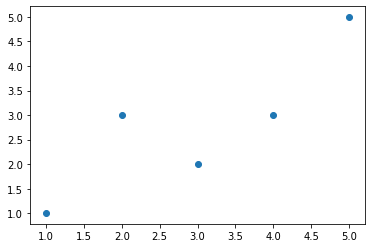

In [3]:
# 2.将数据表示在散点图中
plt.scatter(x,y)

In [4]:
# 3.求数据的平均值
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
# 4.求出数据的均值
# num 代表分子 ， d 代表分母
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num+=(x_i-x_mean) * (y_i-y_mean)
    d+=(x_i-x_mean) ** 2

In [6]:
# 5.计算 a,b的值
a = num/d
b = y_mean -a*x_mean
print("a:"+str(a))
print("b:"+str(b))

a:0.8
b:0.39999999999999947


In [7]:
# 6.线性回归函数，生成函数
y_hat = a*x+b

[0, 6, 0, 6]

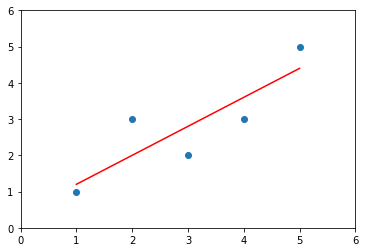

In [8]:
# 7.绘制线性回归图像
plt.scatter(x,y)
plt.plot(x,y_hat,color="red")
plt.axis([0,6,0,6])

In [9]:
# 8.输入一个预测样本，看输出值是多少
x_predict = 6.0
y_predict = a * x_predict + b
y_predict

5.2

### 调用自己封装的 SimpleLinearRegression

In [10]:
from LinearRegression.SimpleLinearRegression import SimpleLinearRegression1

In [11]:
# 1.创建实体
reg1 = SimpleLinearRegression1()

In [12]:
# 2.数据拟合
reg1.fit(x, y)

SimpleLinearRegression1()

In [13]:
# 3.测试数据的结果,返回预测的y
reg1.predict(np.array([x_predict]))

array([5.2])

In [14]:
#4.查看数据拟合时的 a,b
reg1.a_

0.8

In [15]:
reg1.b_

0.39999999999999947

In [16]:
# 5.模拟一组数据
y_hat1 = reg1.predict(x)

[0, 6, 0, 6]

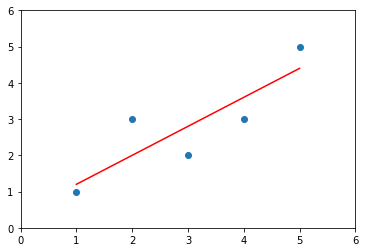

In [17]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])

### SimpleLinearRegression02
对于 a,b 的计算是使用 for 循环的方式，这样效率很低。用向量计算的效率比较高，这个类就是用向量计算的

In [18]:
a2 = (x-x_mean).dot(y-y_mean)/(x-x_mean).dot( (x-x_mean))
a2

0.8

In [19]:
b2 = y_mean-a2*x_mean
b2

0.39999999999999947

### 将SimpleLinearRegression02 封装

In [20]:
from LinearRegression.SimpleLinearRegression import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

SimpleLinearRegression2()

In [21]:
reg1.a_

0.8

In [23]:
reg2.b_

0.39999999999999947

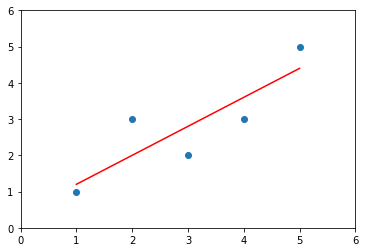

In [26]:
y_hat2 = reg2.predict(x)
plt.scatter(x, y)
plt.plot(x, y_hat2, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

### 对于两个SimpleLinearRegression 的性能测试

In [29]:
# 1.准备数据
m = 100000
big_x = np.random.random(size = m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)

In [30]:
# 2.分别用两种不同的算法对数据进行拟合
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

125 ms ± 3.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
815 µs ± 79.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
# 3.分别查看两者的 a,b
print("a:"+str(reg1.a_))
print("b:"+str(reg1.b_))

a:1.9843097613875376
b:3.0077780369194826


In [35]:
print("a:"+str(reg2.a_))
print("b:"+str(reg2.b_))

a:1.9843097613875234
b:3.0077780369194898
